In [48]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# download an invironment
env = gym.make('FrozenLake-v1', is_slippery=True)

# The function for calculate function of value V accoding given policy
def compute_value_function(policy, env, gamma=0.99, theta=1e-6):
    V = np.zeros(env.observation_space.n)
    while True:
      delta = 0
      for s in range(env.observation_space.n):
        v = 0
        for prob, next_state, reward, done in env.P[s][policy[s]]:
          v += prob * (reward + gamma *V[next_state])
        delta = max(delta, abs(V[s] - v))
        V[s] = v
      if delta < theta:
          break
    return V

In [50]:
# Function for implementing policy iteration
def policy_iteration(env, gamma = 0.99, theta = 1e-6):
    policy = np.random.choice(env.action_space.n, size = (env.observation_space.n))
    stable = False
    while not stable:
        V = compute_value_function(policy, env, gamma, theta)
        stable = True
        for s in range(env.observation_space.n):
            old_action = policy[s]
            action_values = np.zeros(env.action_space.n)
            for a in range(env.action_space.n):
                for prob, next_state, reward, done in env.P[s][a]:
                    action_values[a] += prob * (reward + gamma * V[next_state])
            best_action = np.argmax(action_values)
            if old_action != best_action:
                stable = False
                policy[s] = best_action
    return policy, V

In [51]:
# Function for visualize of policy
def show_render(policy, shape=(4,4)):
    arrows = ['←', '↓', '→', '↑']
    grid = np.array([arrows[a] for a in policy]).reshape(shape)
    for row in grid:
        print(" ".join(row))

In [52]:
def plot_policy(policy, env_shape = (4,4)):
    arrows = ['←', '↓', '→', '↑']
    arrow_dict = {
        0: (-0.4, 0), # Left
        1: (0, -0.4), # Down
        2: (0.4, 0),  # Right
        3: (0, 0.4)   # Up
    }

    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlim(0, env_shape[1])
    ax.set_ylim(0, env_shape[0])
    ax.set_xticks(np.arange(0, env_shape[1]+1))
    ax.set_yticks(np.arange(0, env_shape[0]+1))
    ax.grid(True)

    for state in range(len(policy)):
        row = env_shape[0] - 1 - (state // env_shape[1])
        col = state % env_shape[1]
        dx, dy = arrow_dict[policy[state]]
        tile_type = env.desc[state // env_shape[1]][state % env_shape[1]].decode('utf-8')
        ax.text(col + 0.5, row + 0.5, tile_type,
                ha='center', va='center', fontsize=16, weight='bold',
                bbox=dict(boxstyle='circle,pad=0.3', facecolor='lightgrey' if tile_type == 'F' else 'lightblue' if tile_type == 'S' else 'lightgreen' if tile_type == 'G' else 'salmon', edgecolor='black'))
        ax.arrow(col + 0.5, row +0.5, dx, dy, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
    ax.set_title('Optimal policy')
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.show()

In [53]:
# Starting of iteration for policies
optimal_policy, optimal_V = policy_iteration(env)

In [54]:
# Visualize of policy
print("Optimal policy:")
show_render(optimal_policy)

Optimal policy:
← ↑ ↑ ↑
← ← ← ←
↑ ↓ ← ←
← → ↓ ←


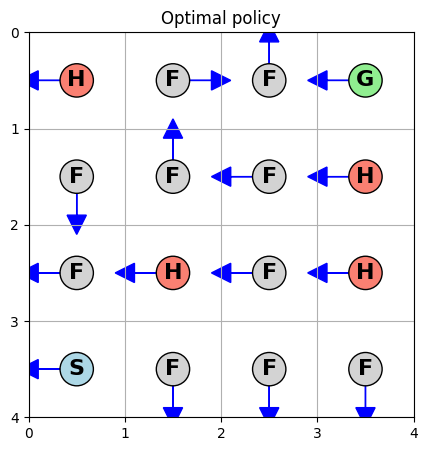

In [56]:
plot_policy(optimal_policy, env_shape=(4, 4))